# Cryptocurrency Volatility Prediction

## 1) Problem statement.

* High Market Uncertainty:Cryptocurrency prices are highly volatile, creating significant risk for traders and investors.

* Lack of Predictive Insight:Existing systems often lack the ability to anticipate volatility trends using data science.

* Decision-Making Under Risk:Accurate volatility predictions can empower market participants to make informed financial decisions, manage exposure, and adapt strategies before turbulence hits.

## 2) What Is Cryptocurrency Volatility?

* Volatility refers to how drastically the price of a cryptocurrency fluctuates over time.
* These frequent and unpredictable changes make crypto markets risky but potentially profitable.
* High volatility can lead to major gains—or losses—for investors and traders.

## 3) Data Collection
- The dataset is downloaded from https://drive.google.com/file/d/1iVhJKnfAR-Vm4JHC-TY4-kXEcfH5C_ky/view?usp=drive_link

### 3.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [16]:
df = pd.read_csv('dataset.csv')

In [3]:
df.dtypes

Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

**Show Top 5 Records**

In [4]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


**Shape of the dataset**

In [5]:
df.shape

(72946, 10)

**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


## 3. EXPLORING DATA

**Changing the index to time stamp and renaming unnamed to SNo**

In [ ]:
df.rename(columns={"Unnamed: 0":"SNo"},inplace=True)
df.index=pd.to_datetime(df.date)
df.drop(["SNo","timestamp",'date'],axis=1,inplace=True)

**Summary of the dataset**

In [20]:
df.describe()

,open,high,low,close,volume,marketCap
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [25]:
df

,open,high,low,close,volume,marketCap,crypto_name
date,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,Bitcoin
2013-05-05,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,Litecoin
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,Bitcoin
2013-05-06,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,Litecoin
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,Bitcoin
...,...,...,...,...,...,...,...
2022-10-23,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,VeChain
2022-10-23,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,Flow
2022-10-23,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,Filecoin


### Feature Information

- **open** : Price at the start of the trading period
- **high** : Highest price reached during the period
- **low** : Lowest price reached during the period
- **close** : Price at the end of the trading period
- **volume** : Indicates trading activity; spikes often accompany increased volatility.
- **marketCap** : Reflects overall valuation and investor confidence.
- **timestamp** : marks the daily record for each cryptocurrency.
- **crypto_name** : identifies the specific cryptocurrency 

In [56]:
# proportion of count data on categorical columns
df['crypto_name'].value_counts(normalize=True) * 100

crypto_name
Bitcoin                  4.452609
Litecoin                 4.452609
XRP                      4.327859
Dogecoin                 4.145532
Monero                   3.928934
Stellar                  3.826118
Tether                   3.539605
Ethereum                 3.323006
Ethereum Classic         2.840457
Basic Attention Token    2.412744
EOS                      2.371617
Bitcoin Cash             2.341458
BNB                      2.338716
TRON                     2.270172
Decentraland             2.264689
Chainlink                2.260576
Cardano                  2.245497
Maker                    2.200258
Filecoin                 2.145423
Theta Network            2.097442
Huobi Token              2.074137
Ravencoin                2.026156
Tezos                    1.871247
VeChain                  1.826008
Quant                    1.816412
USD Coin                 1.735530
Cronos                   1.643682
Wrapped Bitcoin          1.579250
Cosmos                   1.520303
Po

### Top 8 Cryptocurrency are 
**Bitcoin,Litecoin,XRP,Dogecoin,Monero,Stellar,Tether,and Ethereum**                                 
               


### Making a new dataframe with closing price of top 8 bitcoins

In [34]:
closing_prices=pd.DataFrame()
closing_prices['BTC-USD']=pd.DataFrame(df[df['crypto_name']=='Bitcoin']['close'])
closing_prices['XRP-USD']=pd.DataFrame(df[df['crypto_name']=='XRP']['close'])
closing_prices['LTC-USD']=pd.DataFrame(df[df['crypto_name']=='Litecoin']['close'])
closing_prices['Dogecoin']=pd.DataFrame(df[df['crypto_name']=='Dogecoin']['close'])
closing_prices['Monero']=pd.DataFrame(df[df['crypto_name']=='Monero']['close'])
closing_prices['Stellar']=pd.DataFrame(df[df['crypto_name']=='Stellar']['close'])
closing_prices['Tether']=pd.DataFrame(df[df['crypto_name']=='Tether']['close'])

In [35]:
closing_prices

,BTC-USD,XRP-USD,LTC-USD,Dogecoin,Monero,Stellar,Tether
date,,,,,,,
2013-05-05,115.910004,NaN,3.590890,NaN,NaN,NaN,NaN
2013-05-06,112.300003,NaN,3.371250,NaN,NaN,NaN,NaN
2013-05-07,111.500000,NaN,3.332740,NaN,NaN,NaN,NaN
2013-05-08,113.566002,NaN,3.409240,NaN,NaN,NaN,NaN
2013-05-09,112.669998,NaN,3.416150,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-09-25,18802.097976,0.492627,52.632001,0.061152,141.104094,0.117394,1.000055
2022-10-02,19044.107272,0.448850,51.911633,0.059288,136.917337,0.118571,1.000060
2022-10-09,19446.426194,0.534061,53.910038,0.062156,145.686264,0.128840,1.000158


### We can see alot of NAN value since some cryptocurrencies came later we will look after the date 06-05-2016

In [36]:
closing_prices=closing_prices.loc[closing_prices.index>"06-05-2016"]
closing_prices

,BTC-USD,XRP-USD,LTC-USD,Dogecoin,Monero,Stellar,Tether
date,,,,,,,
2016-06-06,585.536987,0.005769,4.959160,0.000236,1.006880,0.001496,1.000000
2016-06-07,576.596985,0.005780,4.770780,0.000240,1.005010,0.001488,1.000000
2016-06-08,581.645020,0.005770,4.748170,0.000246,0.999952,0.001497,1.000000
2016-06-09,574.630005,0.005788,4.693120,0.000265,1.114880,0.001587,1.000000
2016-06-10,577.469971,0.005736,4.840000,0.000260,1.147060,0.001573,1.000000
...,...,...,...,...,...,...,...
2022-09-25,18802.097976,0.492627,52.632001,0.061152,141.104094,0.117394,1.000055
2022-10-02,19044.107272,0.448850,51.911633,0.059288,136.917337,0.118571,1.000060
2022-10-09,19446.426194,0.534061,53.910038,0.062156,145.686264,0.128840,1.000158


### Count of every cryptocurrency

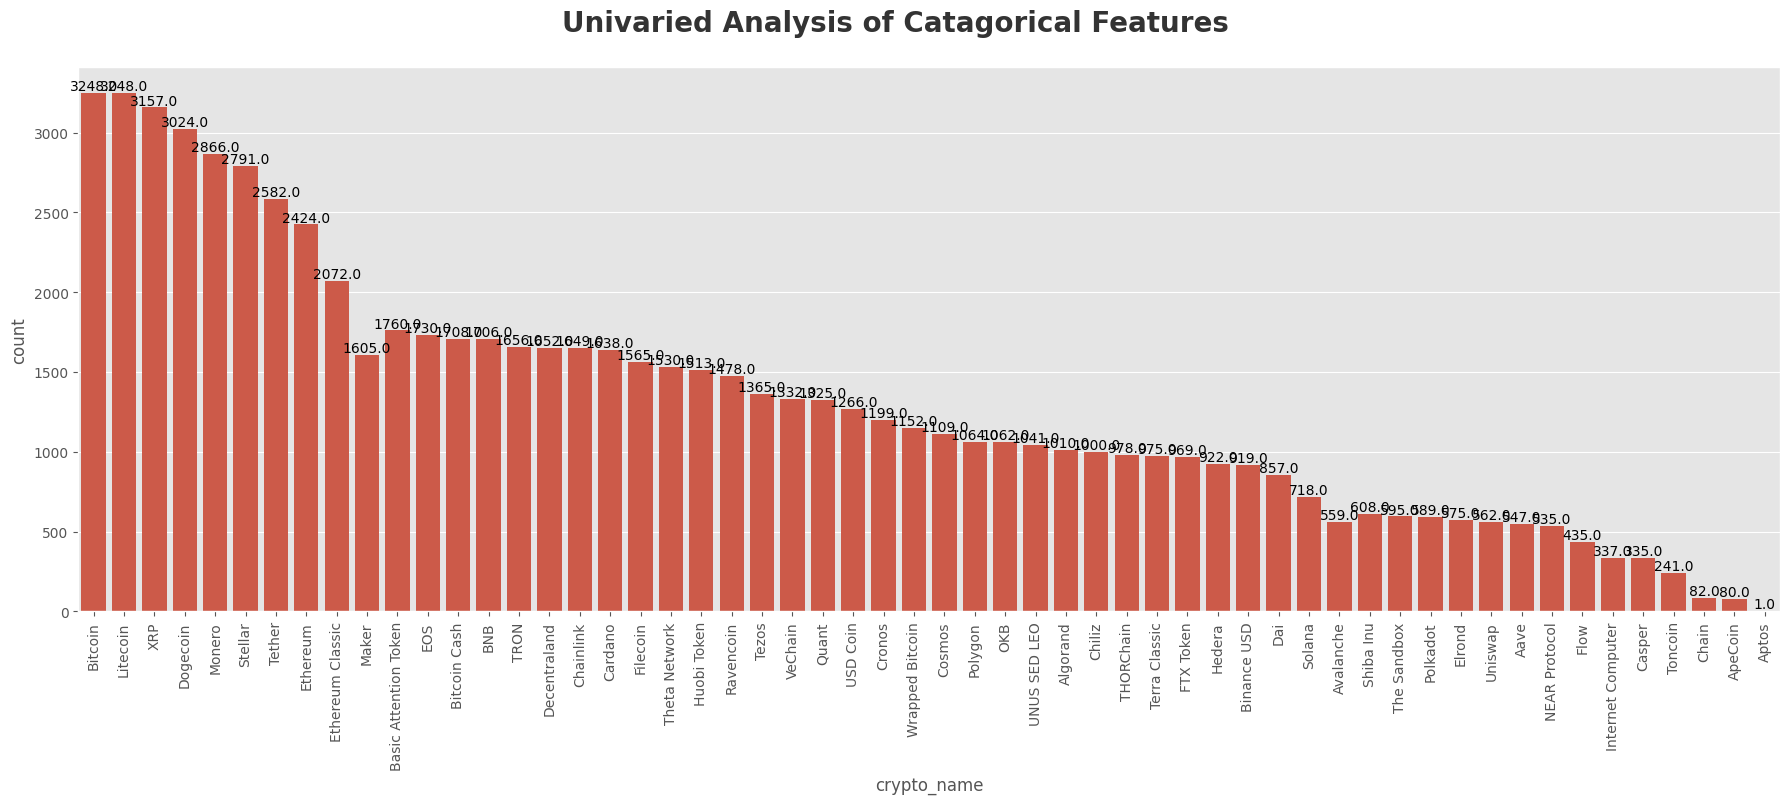

In [38]:
#catagorical columns
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.style.use('ggplot')
plt.grid(True)
plt.suptitle('Univaried Analysis of Catagorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

ax = sns.countplot(x=df['crypto_name'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel(categorical_features[0])
plt.xticks(rotation=90)
plt.tight_layout()

**Report**
- For column
Most of the coustemer are purchasing the `Bitcoin` followed by `Litecoin` then `XRP`and soo on.

### Lets calculate Daily returns

In [40]:
daily_returns=closing_prices.pct_change().dropna(axis=0)
daily_returns

,BTC-USD,XRP-USD,LTC-USD,Dogecoin,Monero,Stellar,Tether
date,,,,,,,
2016-06-07,-0.015268,0.001801,-0.037986,0.017051,-0.001857,-0.005662,0.000000
2016-06-08,0.008755,-0.001588,-0.004739,0.025469,-0.005033,0.006070,0.000000
2016-06-09,-0.012061,0.002967,-0.011594,0.079981,0.114933,0.060524,0.000000
2016-06-10,0.004942,-0.008890,0.031297,-0.018225,0.028864,-0.008972,0.000000
2016-06-11,0.050664,0.005199,0.035946,-0.029621,-0.004987,0.001678,0.000000
...,...,...,...,...,...,...,...
2022-09-25,-0.037967,0.272698,-0.004593,0.043333,0.004396,0.049537,-0.000052
2022-10-02,0.012871,-0.088865,-0.013687,-0.030476,-0.029671,0.010024,0.000005
2022-10-09,0.021126,0.189842,0.038496,0.048362,0.064045,0.086612,0.000098


## Now we need to cumulate these returns to make cryptos comaparable

In [41]:
daily_cum_returns=(daily_returns+1).cumprod()-1
daily_cum_returns

,BTC-USD,XRP-USD,LTC-USD,Dogecoin,Monero,Stellar,Tether
date,,,,,,,
2016-06-07,-0.015268,0.001801,-0.037986,0.017051,-0.001857,-0.005662,0.000000
2016-06-08,-0.006647,0.000210,-0.042546,0.042954,-0.006881,0.000374,0.000000
2016-06-09,-0.018627,0.003177,-0.053646,0.126371,0.107262,0.060921,0.000000
2016-06-10,-0.013777,-0.005741,-0.024028,0.105843,0.139222,0.051403,0.000000
2016-06-11,0.036189,-0.000572,0.011054,0.073086,0.133541,0.053167,0.000000
...,...,...,...,...,...,...,...
2022-09-25,31.110863,84.388750,9.613088,258.636505,139.139925,77.470246,0.000055
2022-10-02,31.524175,76.800679,9.467828,250.723816,134.981776,78.256861,0.000060
2022-10-09,32.211269,91.570521,9.870801,262.897762,143.690785,85.121420,0.000158


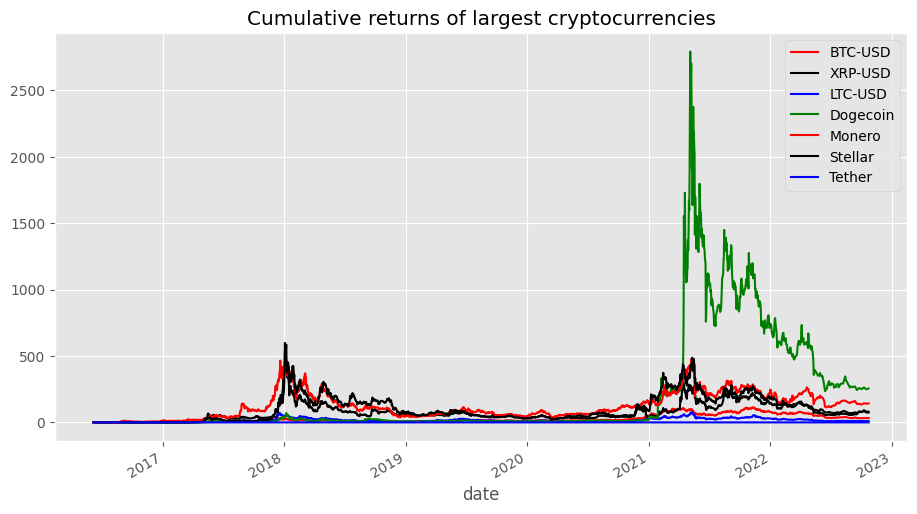

In [44]:
colors=['r','k','b','g']
daily_cum_returns.plot(color=colors,figsize=(11,6))
plt.title('Cumulative returns of largest cryptocurrencies')
plt.show()

## Top 4 Cryptocurrency Price chart over last 9 years

Text(0, 0.5, 'Price in USD')

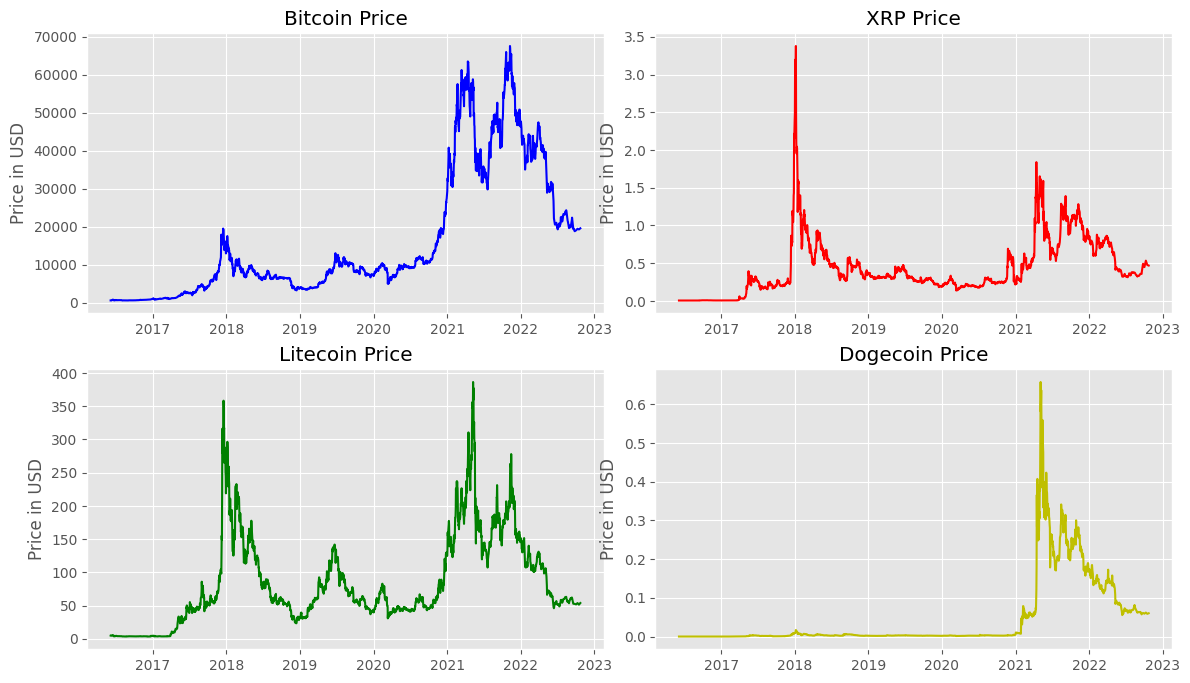

In [48]:
fig,axs=plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2,'wspace':0.1})

axs[0,0].plot(closing_prices['BTC-USD'],color='b')
axs[0,0].set_title('Bitcoin Price')
axs[0,1].plot(closing_prices['XRP-USD'],color='r')
axs[0,1].set_title('XRP Price')
axs[1,0].plot(closing_prices['LTC-USD'],color='g')
axs[1,0].set_title('Litecoin Price')
axs[1,1].plot(closing_prices['Dogecoin'],color='y')
axs[1,1].set_title('Dogecoin Price')
axs[0,0].set_ylabel('Price in USD')
axs[0,1].set_ylabel('Price in USD')
axs[1,0].set_ylabel('Price in USD')
axs[1,1].set_ylabel('Price in USD')

## Comparison of daily volatility

Text(0.5, 1.0, 'Dogecoin Price')

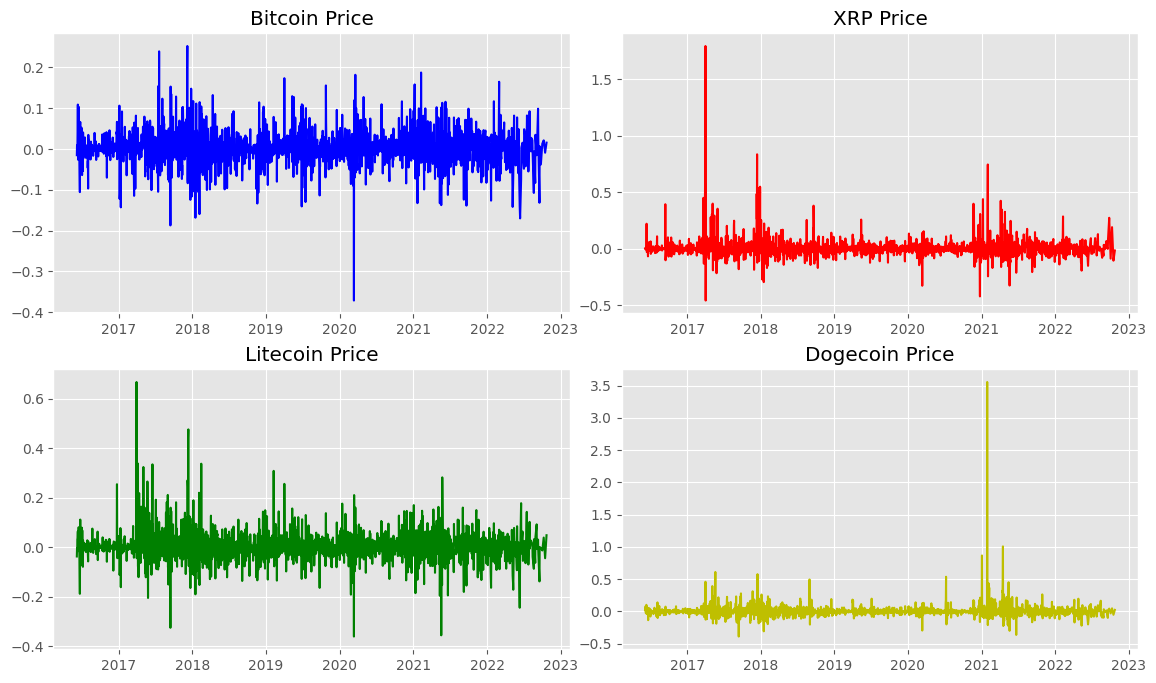

In [49]:
fig,axs=plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2,'wspace':0.1})

axs[0,0].plot(daily_returns['BTC-USD'],color='b')
axs[0,0].set_title('Bitcoin Price')
axs[0,1].plot(daily_returns['XRP-USD'],color='r')
axs[0,1].set_title('XRP Price')
axs[1,0].plot(daily_returns['LTC-USD'],color='g')
axs[1,0].set_title('Litecoin Price')
axs[1,1].plot(daily_returns['Dogecoin'],color='y')
axs[1,1].set_title('Dogecoin Price')

## How are returns distributed?

Text(0.5, 1.0, 'Dogecoin Price')

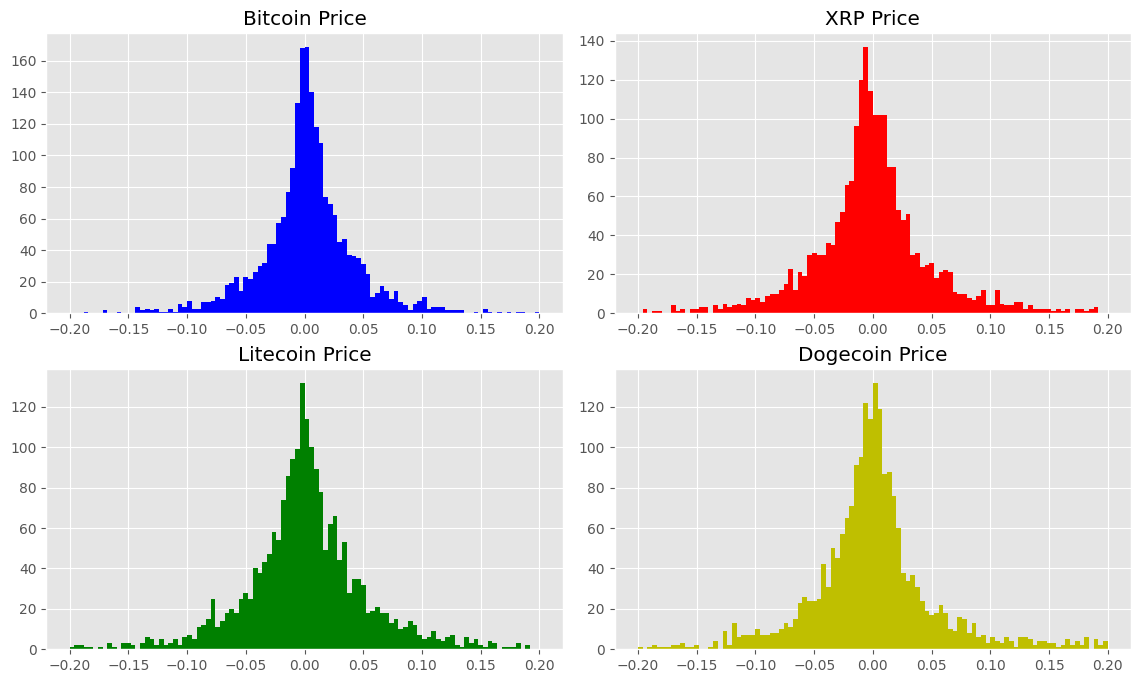

In [50]:
fig,axs=plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2,'wspace':0.1})

axs[0,0].hist(daily_returns['BTC-USD'],color='b',bins=100,range=(-0.2,0.2))
axs[0,0].set_title('Bitcoin Price')
axs[0,1].hist(daily_returns['XRP-USD'],color='r',bins=100,range=(-0.2,0.2))
axs[0,1].set_title('XRP Price')
axs[1,0].hist(daily_returns['LTC-USD'],color='g',bins=100,range=(-0.2,0.2))
axs[1,0].set_title('Litecoin Price')
axs[1,1].hist(daily_returns['Dogecoin'],color='y',bins=100,range=(-0.2,0.2))
axs[1,1].set_title('Dogecoin Price')

## Extreme Returns

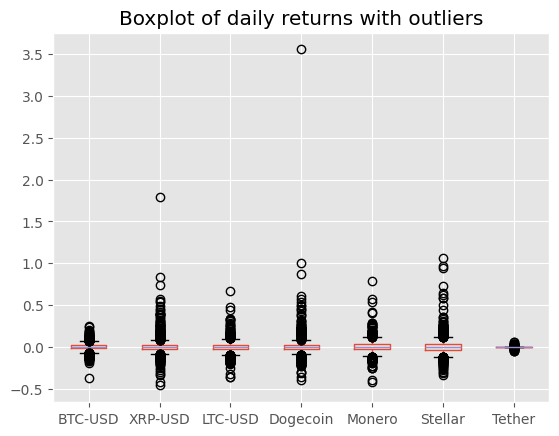

In [51]:
daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show()

##  Without Outliers


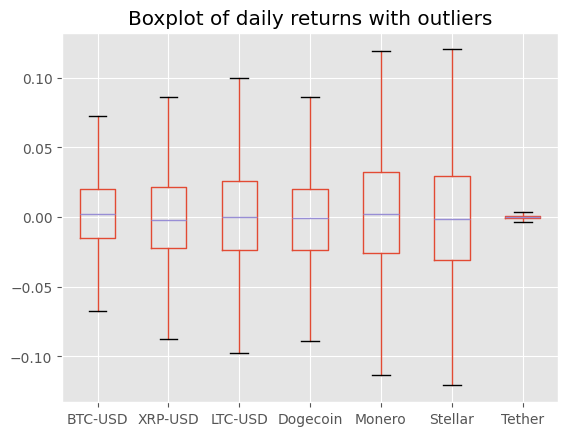

In [52]:
daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns with outliers')
plt.show()

**Only postive returns are from `Bitcoin`and `Monero`**

## Correlation matrix

In [53]:
daily_returns.corr()

,BTC-USD,XRP-USD,LTC-USD,Dogecoin,Monero,Stellar,Tether
BTC-USD,1.000000,0.375800,0.658741,0.360808,0.578823,0.439104,-0.006818
XRP-USD,0.375800,1.000000,0.437486,0.271717,0.334502,0.581813,-0.019913
LTC-USD,0.658741,0.437486,1.000000,0.351006,0.530140,0.454534,-0.023536
Dogecoin,0.360808,0.271717,0.351006,1.000000,0.278571,0.328785,-0.016654
Monero,0.578823,0.334502,0.530140,0.278571,1.000000,0.420370,-0.020028
Stellar,0.439104,0.581813,0.454534,0.328785,0.420370,1.000000,0.002697
Tether,-0.006818,-0.019913,-0.023536,-0.016654,-0.020028,0.002697,1.000000


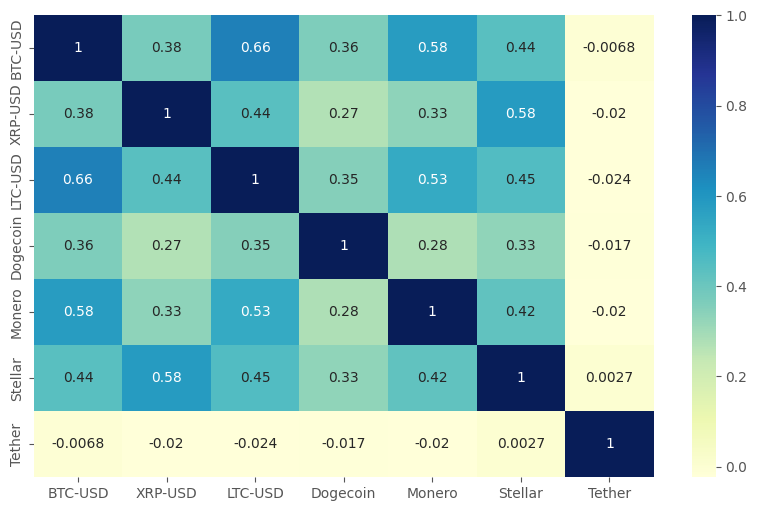

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(daily_returns.corr(),annot=True, cmap="YlGnBu")
plt.show()

# Feature Extraction

### Create relevant features such as moving averages, rolling volatility, liquidity ratios (e.g., volume/market cap), and technical indicators (e.g., Bollinger Bands, ATR)

### I am going to focus on Bitcoin we can do the same analysis with other cryptocurrency

In [ ]:
df_bitcoin=df[df['crypto_name']=='Bitcoin']

In [74]:
df_bitcoin

,open,high,low,close,volume,marketCap,crypto_name
date,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,Bitcoin
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,Bitcoin
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,Bitcoin
2013-05-08,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,Bitcoin
2013-05-09,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,Bitcoin
...,...,...,...,...,...,...,...
2022-09-25,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,Bitcoin
2022-10-02,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,Bitcoin
2022-10-09,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,Bitcoin


### Calculating moving_average,rolling_average,liquidity_ratio,ATR,bollinger_upper,bollinger_lowerby creating a function

In [ ]:
def calculate_moving_average(df, window):
    return df['close'].rolling(window=window).mean()

def calculate_rolling_volatility(df, window):
    return df['close'].rolling(window=window).std()

def calculate_liquidity_ratio(df):
    return df['volume'] / df['marketCap']

def calculate_atr(df, window):
    # Calculate True Range (TR)
    high_low = df['high'] - df['low']
    high_close = np.abs(df['high'] - df['close'].shift())
    low_close = np.abs(df['low'] - df['close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)

    # Calculate ATR
    atr = tr.rolling(window=window).mean()
    return atr

def calculate_bollinger_bands(df, window, num_std):
    rolling_mean = df['close'].rolling(window=window).mean()
    rolling_std = df['close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# Apply Feature Engineering
window_ma = 20  # Window for moving average
window_volatility = 20  # Window for rolling volatility
window_atr = 14  # Window for ATR
num_std_bollinger = 2  # Number of standard deviations for Bollinger Bands

df_bitcoin['moving_average'] = calculate_moving_average(df_bitcoin, window_ma)
df_bitcoin['rolling_volatility'] = calculate_rolling_volatility(df_bitcoin, window_volatility)
df_bitcoin['liquidity_ratio'] = calculate_liquidity_ratio(df_bitcoin)
df_bitcoin['atr'] = calculate_atr(df_bitcoin, window_atr)
df_bitcoin['bollinger_upper'], df_bitcoin['bollinger_lower'] = calculate_bollinger_bands(df_bitcoin, window_ma, num_std_bollinger)
df_bitcoin['bollinger_upper'], df_bitcoin['bollinger_lower'] = calculate_bollinger_bands(df_bitcoin, window_ma, num_std_bollinger)
df_bitcoin.head()

In [78]:
df_bitcoin.head()

,open,high,low,close,volume,marketCap,crypto_name,moving_average,rolling_volatility,liquidity_ratio,atr,bollinger_upper,bollinger_lower
date,,,,,,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,NaN,NaN,0.0,NaN,NaN,NaN
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,NaN,NaN,0.0,NaN,NaN,NaN
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,NaN,NaN,0.0,NaN,NaN,NaN
2013-05-08,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,Bitcoin,NaN,NaN,0.0,NaN,NaN,NaN
2013-05-09,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,Bitcoin,NaN,NaN,0.0,NaN,NaN,NaN


## Imputing the missing values with mean

In [79]:
#imputing with mean vlaues
df_bitcoin['moving_average'].fillna(df_bitcoin['moving_average'].mean(), inplace=True)
df_bitcoin['rolling_volatility'].fillna(df_bitcoin['rolling_volatility'].mean(), inplace=True)
df_bitcoin['liquidity_ratio'].fillna(df_bitcoin['liquidity_ratio'].mean(), inplace=True)
df_bitcoin['atr'].fillna(df_bitcoin['atr'].mean(), inplace=True)
df_bitcoin['bollinger_upper'].fillna(df_bitcoin['bollinger_upper'].mean(), inplace=True)
df_bitcoin['bollinger_lower'].fillna(df_bitcoin['bollinger_lower'].mean(), inplace=True)
df_bitcoin

,open,high,low,close,volume,marketCap,crypto_name,moving_average,rolling_volatility,liquidity_ratio,atr,bollinger_upper,bollinger_lower
date,,,,,,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,Bitcoin,9692.078464,725.111144,0.000000,559.261824,11142.300752,8241.856175
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,Bitcoin,9692.078464,725.111144,0.000000,559.261824,11142.300752,8241.856175
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,Bitcoin,9692.078464,725.111144,0.000000,559.261824,11142.300752,8241.856175
2013-05-08,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,Bitcoin,9692.078464,725.111144,0.000000,559.261824,11142.300752,8241.856175
2013-05-09,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,Bitcoin,9692.078464,725.111144,0.000000,559.261824,11142.300752,8241.856175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,Bitcoin,21655.084841,1744.970143,0.064842,1324.932997,25145.025126,18165.144555
2022-10-02,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,Bitcoin,21483.005742,1826.537867,0.056889,1292.105375,25136.081476,17829.930007
2022-10-09,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,Bitcoin,21324.868813,1860.501451,0.045155,1244.462824,25045.871716,17603.865910


## Liquidity Ratio Over Time for Bitcoin

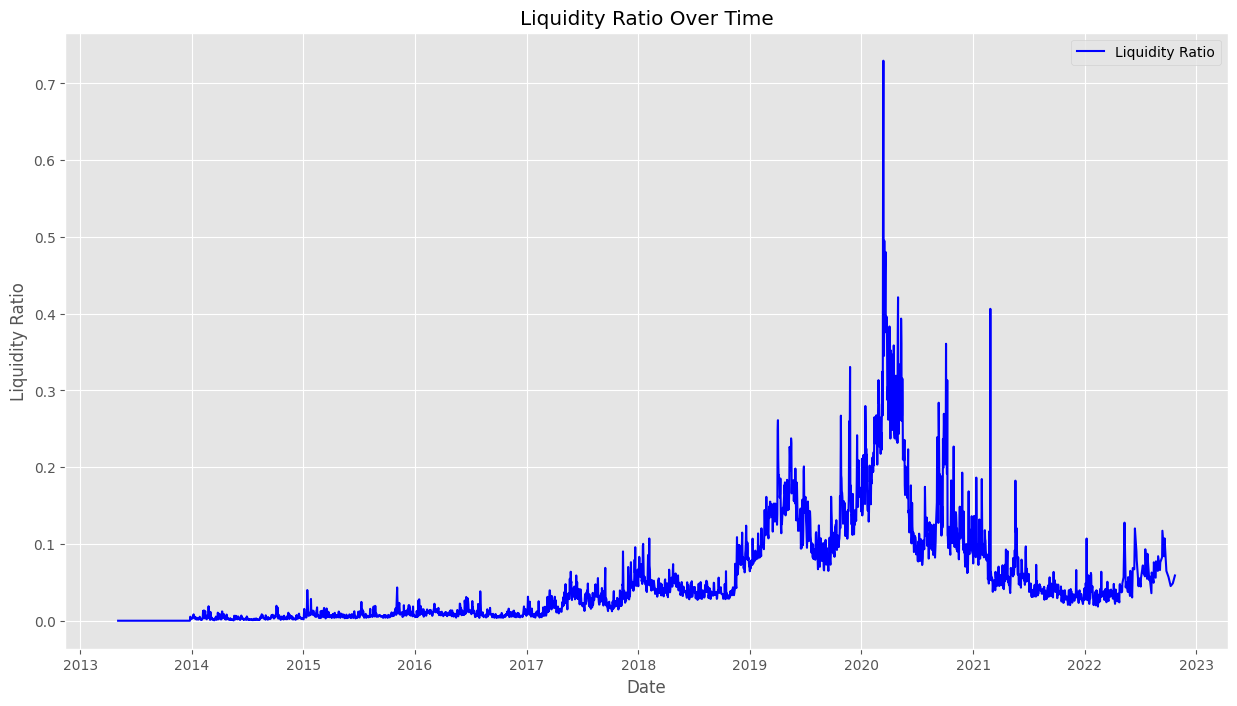

In [80]:
plt.figure(figsize=(15, 8))
plt.plot(df_bitcoin['liquidity_ratio'],label='Liquidity Ratio', color='blue')
plt.title('Liquidity Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Liquidity Ratio')
plt.legend()
plt.show()

## Bollinger Bands for Bitcoin

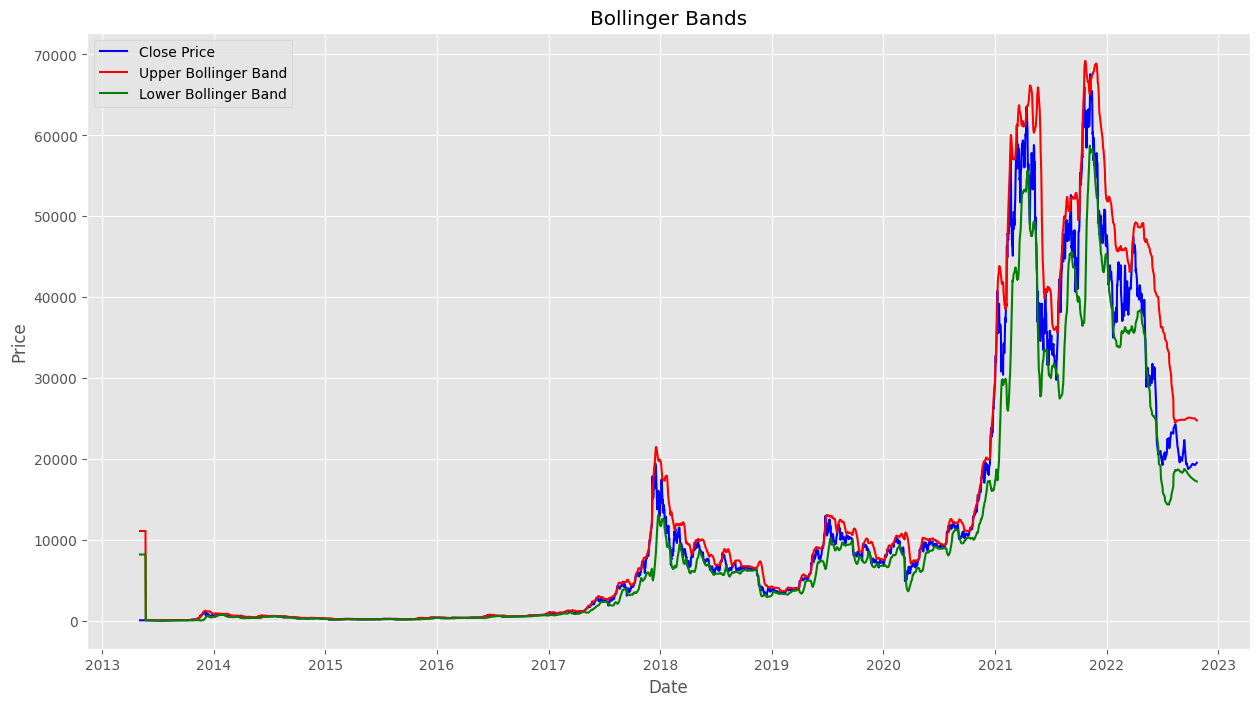

In [81]:
plt.figure(figsize=(15, 8))
plt.plot(df_bitcoin['close'], label='Close Price', color='blue')
plt.plot(df_bitcoin['bollinger_upper'], label='Upper Bollinger Band', color='red')
plt.plot(df_bitcoin['bollinger_lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Average True Range(ATR) Over Time for Bitcoin

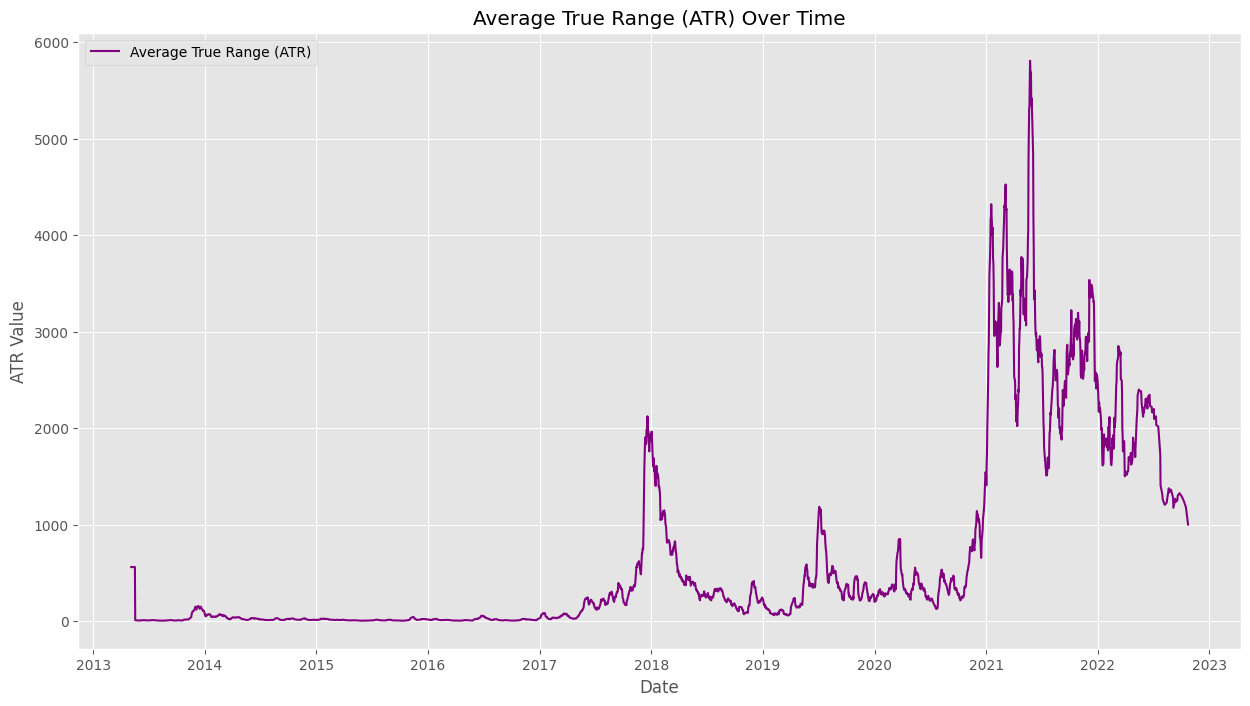

In [82]:
#plot atr
plt.figure(figsize=(15, 8))
plt.plot(df_bitcoin['atr'], label='Average True Range (ATR)', color='purple')
plt.title('Average True Range (ATR) Over Time')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.legend()
plt.show()